In [108]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X,y = make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,
                          n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=20)

In [110]:
X = np.insert(X,0,1,axis=1)
X

array([[ 1.        ,  0.51123145, -0.11697552],
       [ 1.        ,  0.06316371, -0.73115232],
       [ 1.        , -0.0425064 , -0.7081059 ],
       [ 1.        , -3.2891569 , -2.01199214],
       [ 1.        ,  0.1111445 ,  1.63493163],
       [ 1.        , -2.53070306,  0.15599044],
       [ 1.        , -3.49036198,  1.07782053],
       [ 1.        ,  0.3976447 ,  0.80626713],
       [ 1.        , -0.24666899,  0.74859527],
       [ 1.        , -3.65803446,  0.75152794],
       [ 1.        , -3.47658131, -0.90114581],
       [ 1.        , -3.47815037, -0.1815243 ],
       [ 1.        ,  0.29004249, -2.98092432],
       [ 1.        ,  1.11761831,  1.20500136],
       [ 1.        , -3.52530398,  0.78302407],
       [ 1.        ,  0.69929128,  0.42968688],
       [ 1.        ,  0.17089733, -0.73229726],
       [ 1.        , -3.57785124, -0.83930476],
       [ 1.        ,  0.12965489,  0.83727062],
       [ 1.        , -3.46888717, -0.10255323],
       [ 1.        , -3.97487212,  0.658

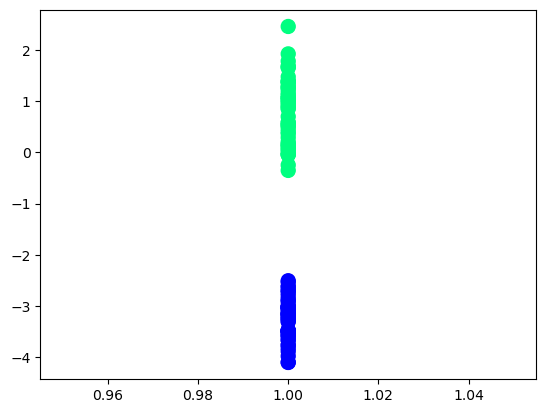

In [111]:
plt.scatter(X[:,0],X[:,1],c=y,cmap="winter",s=100)

In [112]:
# prediction function
def hyp(x,teta):
    z = (x@teta.T)
    return 1/(1+np.exp(-z))

In [113]:
e = np.exp(-0)
e

1.0

In [114]:
teta = np.ones(X.shape[1])
prd = hyp(X,teta)
prd

array([0.80127081, 0.5822487 , 0.56202579, 0.01337175, 0.93969136,
       0.20185952, 0.19583351, 0.90060025, 0.8178616 , 0.12937384,
       0.03299885, 0.06539521, 0.15565991, 0.9651967 , 0.14902358,
       0.89368796, 0.6079254 , 0.03176358, 0.8772805 , 0.07099924,
       0.08978997, 0.13740783, 0.12864022, 0.96743094, 0.188396  ,
       0.97784515, 0.03631753, 0.06064122, 0.02565295, 0.11286055,
       0.13370738, 0.87025227, 0.90180277, 0.88278354, 0.7017403 ,
       0.53761163, 0.31362412, 0.95913467, 0.14519277, 0.86392146,
       0.06476386, 0.19723094, 0.25587262, 0.96936535, 0.16562806,
       0.96475427, 0.86094709, 0.05435935, 0.0364124 , 0.29128548,
       0.71751892, 0.7516917 , 0.14585444, 0.91908833, 0.96391891,
       0.10086454, 0.94429569, 0.05557222, 0.12248378, 0.50042378,
       0.95186134, 0.22169609, 0.25139459, 0.94024834, 0.80663139,
       0.89777429, 0.00868752, 0.75694186, 0.19681049, 0.40115822,
       0.01912027, 0.97464125, 0.88900999, 0.0893466 , 0.97203

In [115]:
if prd[1]>0.5:
    print(True)
else:
    print(False)

True


In [116]:
# cost function 
def cost_function(y,prd):
    m = y.shape[0]
    cost = -(1/m) * np.sum(y * np.log(prd) + (1 - y) * np.log(1 - prd))
    return cost

In [117]:
cost = cost_function(y,prd)
cost

0.18584952213353917

In [118]:
# gradient descent 
def Gradient(x,y,teta,lr,itr):
    m = y.shape[0]
    cost_hist = []
    for i in range(itr):
        pred = hyp(x,teta)
        gradient = (1/m)*(x.T@(pred-y))
        teta = teta -lr*gradient
        cost = cost_function(y,pred)
        cost_hist.append(cost)
        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost:.4f}")

    return teta,cost_hist
    

In [119]:
tetha,cost_history = Gradient(X,y,teta,0.1,1000)
cost_history

Iteration 0: Cost = 0.1858
Iteration 100: Cost = 0.0588
Iteration 200: Cost = 0.0382
Iteration 300: Cost = 0.0289
Iteration 400: Cost = 0.0235
Iteration 500: Cost = 0.0199
Iteration 600: Cost = 0.0173
Iteration 700: Cost = 0.0154
Iteration 800: Cost = 0.0138
Iteration 900: Cost = 0.0126


[0.18584952213353917,
 0.1794038766020122,
 0.17358887015355903,
 0.16830935269097821,
 0.1634882404503911,
 0.15906251587926476,
 0.15498022062752997,
 0.15119817209428332,
 0.1476802125044835,
 0.14439585381701245,
 0.14131921968392433,
 0.13842821239242706,
 0.13570385171498495,
 0.1331297462248521,
 0.13069166750765918,
 0.12837720491455984,
 0.1261754838203136,
 0.12407693430206579,
 0.12207310011573075,
 0.12015648008253724,
 0.1183203956987268,
 0.11655888008393803,
 0.11486658438837463,
 0.1132386985586683,
 0.11167088397148507,
 0.11015921592259634,
 0.10870013433744986,
 0.1072904013699212,
 0.10592706479611161,
 0.1046074263029194,
 0.10332901392672306,
 0.10208955802366164,
 0.10088697025571886,
 0.09971932516082374,
 0.09858484394416776,
 0.0974818801848196,
 0.09640890719879802,
 0.09536450683887387,
 0.09434735954398292,
 0.09335623547840988,
 0.09238998662380586,
 0.09144753970638485,
 0.09052788985793404,
 0.08963009492307614,
 0.08875327033694796,
 0.08789658450745497